In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
"""
Logistic Regression is kind of close to a binary classification in which we want to predict an outcome
based on some dependent variables and this outcome will either be a yes or a no (0 or 1). It has the same
concept as a simple regression in which we train parameters and test them, however the difference is that the
curve of the function is not linear and it is bounded between 0 and 1. In most cases, we use a sigmoid function
to fit the points on this curve. It is more powerful than simple regression, since in some cases, our data points
are not linear and outliers might affect our fitted curve. Take the following example:

1                        xxxx
0            xxxx
            
Take these points as our data points, a simple regression might be able to separate them, however if we have the following:

1                        xxxx             x
0            xxxx

This outlier might cause the simple regression curve to rule out some points that are considered as 1 to be 0. That's why
in these cases, we use logistic regression since we'll be able to fit all the points through a sigmoid function and in
general it is a really effective way to do binary classification.

"""

"\nLogistic Regression is kind of close to a binary classification in which we want to predict an outcome\nbased on some dependent variables and this outcome will either be a yes or a no (0 or 1). It has the same\nconcept as a simple regression in which we train parameters and test them, however the difference is that the\ncurve of the function is not linear and it is bounded between 0 and 1. In most cases, we use a sigmoid function\nto fit the points on this curve. It is more powerful than simple regression, since in some cases, our data points\nare not linear and outliers might affect our fitted curve. Take the following example:\n\n1                        xxxx\n0            xxxx\n            \nTake these points as our data points, a simple regression might be able to separate them, however if we have the following:\n\n1                        xxxx             x\n0            xxxx\n\nThis outlier might cause the simple regression curve to rule out some points that are considered as 

In [76]:
df = pd.read_csv('train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
#the sex is of type object and it only has male or female, therefore we can onehot encode it and turn it into 0 or 1
# to be able to quantify and analyse it better.
df = pd.get_dummies(df, columns=['Sex'], drop_first=True) 
# get_dummies usually gives us 2 columns, 1 for male and 1 for female, but since the result is either 0 or 1
# it's enough to have 1 column since we can derive the second from the first.
# for example if male is 0 then for sure we have a female so we don't need a separate column for the female.
df.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,False


In [78]:
df.describe()

#  -we realize that not all people have an age so we have missing values.
#  -also the age is in years and the minimum age is 0.42 hence this is a baby under 1 years of age
#  -we also realize that in Parch, 75% of the data is 0, and we were told that
#   some children travelled only with a nany, therefore 75% of the population is 
#   affected by these children who travelled only with a nanny
#  -we also realize that we have more males than females
#  -we also have outliers in the fare since 75% of the data paid a value less than 31 and then the max
#   is 512 which is an outlier


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_male          bool
dtype: object

In [80]:
# the cabin number is useless data in our dataset, so we can drop it
df = df.drop(['Cabin','Ticket','Name'], axis=1)
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,True
1,2,1,1,38.0,1,0,71.2833,C,False
2,3,1,3,26.0,0,0,7.9250,S,False
3,4,1,1,35.0,1,0,53.1000,S,False
4,5,0,3,35.0,0,0,8.0500,S,True
5,6,0,3,NaN,0,0,8.4583,Q,True
6,7,0,1,54.0,0,0,51.8625,S,True
7,8,0,3,2.0,3,1,21.0750,S,True
8,9,1,3,27.0,0,2,11.1333,S,False
9,10,1,2,14.0,1,0,30.0708,C,False


In [81]:
#As for Embarked, we can also 1 hot encode it
df = pd.get_dummies(df, columns=['Embarked']) 
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,False,True
5,6,0,3,NaN,0,0,8.4583,True,False,True,False
6,7,0,1,54.0,0,0,51.8625,True,False,False,True
7,8,0,3,2.0,3,1,21.0750,True,False,False,True
8,9,1,3,27.0,0,2,11.1333,False,False,False,True
9,10,1,2,14.0,1,0,30.0708,False,True,False,False


In [82]:
df.describe()
#    We notice that more than 25% embarked from Southampton and less than 25% embarked from Cherbourg
#    and less than 25% embarked from Queenstown

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


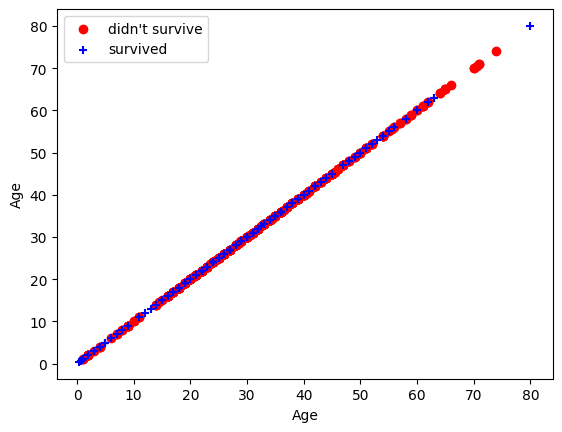

In [83]:
idx_1 = np.where(df['Survived'] == 0)
idx_2 = np.where(df['Survived'] == 1)
fig = plt. figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.iloc[idx_1]['Age'],df.iloc[idx_1]['Age'],c='r',marker="o",label="didn't survive")
ax1.scatter(df.iloc[idx_2]['Age'],df.iloc[idx_2]['Age'],c='b',marker="+",label="survived")
ax1.set_xlabel('Age')
ax1.set_ylabel('Age')
plt.legend() 
plt.show ()

#    From this we can infer that most of the people who survived are low age people, but this is because 75% the people
#    are below the age of 38, so it makes sense to obtain such data and we cannot infer much about it
#    we also have a noisy data that we should remove

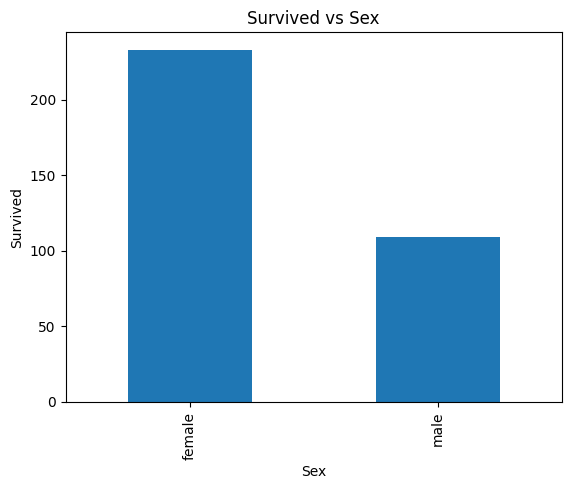

In [84]:
group = df.groupby(['Sex_male', 'Survived']).size()
counts = pd.DataFrame({'Survived': group.loc[:, 1].values}, index=['female', 'male'])

bar = counts.plot(kind='bar', legend=False)

plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survived vs Sex')

plt.show()


#    The following result is intriguing since we can see that the amount of people survived include more females than
#    males, almost double. This happened even though we saw that 64% of the population were males, however it looks
#    like priority was given for the females to survive and not the males. If we do the necessary calculations since
#    we have the entire population and the % of whom survived, we can see that we have around 314 females on the boat
#    and around 230 of them survuved, so this is a survival rate of 73% for the females 

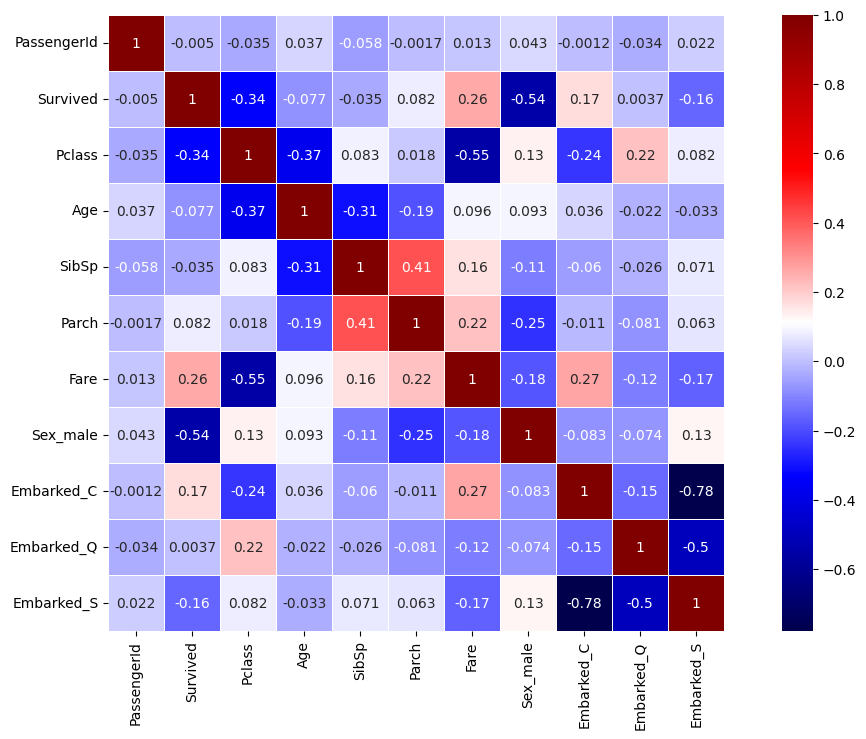

In [85]:
corr_matrix = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic',square=True, linewidths=0.5)

plt.show()

#from this we can infer a lot of information
#   -first of all, the embarked_Q doesn't really affect our number of survived people so it is basically irrelevant
#    data we can remove and also it can be infered from C and S, so it is not really needed.
#   -second of all, the survived mostly depend on the gender as we previously saw and they are negatively correlated
#    meaning females have a better survival chance than males since males take the value 1.
#   -third of all, Pclass is also correlated with Fare, meaning the higher the class, the more the passengers are
#    willing to pay for public transport since they have more money.
#   -fourth of all, Pclass and Fare are well correlated with the survival rate in which the higher the Pclass
#    (1 is higher than 2 and 3) is the higher the fare (the more they can pay) and the higher their survival rate.
#    This can be justified by the fact that they are rich people and have connections and money, so they can pull some
#    strings to bypass other people and survive the incident

In [86]:
df = df.drop('Embarked_Q', axis=1)
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,True,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
5,6,0,3,NaN,0,0,8.4583,True,False,False
6,7,0,1,54.0,0,0,51.8625,True,False,True
7,8,0,3,2.0,3,1,21.0750,True,False,True
8,9,1,3,27.0,0,2,11.1333,False,False,True
9,10,1,2,14.0,1,0,30.0708,False,True,False


In [87]:
# we need to filter the people with high ages since they create noisy data and the people with no age
# here we have a small number of null values so it's okay to remove them.
df = df[df['Age'] <= 65]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,706.000000,706.000000,706.00000,706.000000,706.000000,706.000000,706.000000
mean,448.504249,0.409348,2.24221,29.224745,0.516997,0.434844,34.773654
std,258.557270,0.492062,0.83673,13.897431,0.933457,0.856765,53.162527
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,1.00000,20.000000,0.000000,0.000000,8.050000
50%,443.500000,0.000000,2.50000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.00000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.00000,65.000000,5.000000,6.000000,512.329200


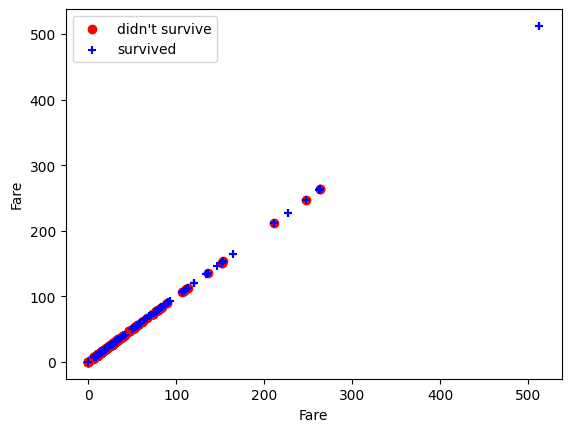

In [88]:
idx_1 = np.where(df['Survived'] == 0)
idx_2 = np.where(df['Survived'] == 1)
fig = plt. figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.iloc[idx_1]['Fare'],df.iloc[idx_1]['Fare'],c='r',marker="o",label="didn't survive")
ax1.scatter(df.iloc[idx_2]['Fare'],df.iloc[idx_2]['Fare'],c='b',marker="+",label="survived")
ax1.set_xlabel('Fare')
ax1.set_ylabel('Fare')
plt.legend() 
plt.show ()
#Here we also have noisy data, so I will clean any data above 100

In [89]:
df = df[df['Fare'] <= 100]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,447.019757,0.384498,2.332827,29.025456,0.504559,0.395137,23.522517
std,261.678078,0.486847,0.793918,13.839010,0.938348,0.834259,21.255789
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.750000,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.929150
75%,676.750000,1.000000,3.000000,37.000000,1.000000,0.000000,28.928125
max,891.000000,1.000000,3.000000,65.000000,5.000000,6.000000,93.500000


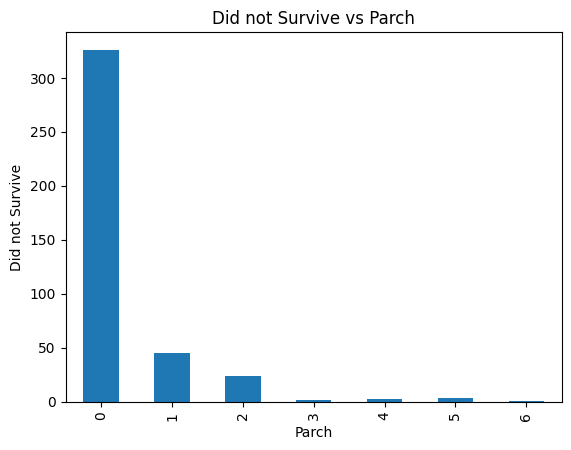

In [90]:
group = df.groupby(['Parch', 'Survived']).size()
counts = pd.DataFrame({'Did not Survive': group.loc[:, 0].values}, index=['0', '1', '2', '3', '4', '5', '6'])

bar = counts.plot(kind='bar', legend=False)

plt.xlabel('Parch')
plt.ylabel('Did not Survive')
plt.title('Did not Survive vs Parch')

plt.show()
#there is barely any data on 3-4-5-6, so we can filter them

In [91]:
df = df[df['Parch'] <= 2]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,446.104037,0.386646,2.321429,28.850543,0.498447,0.313665,23.387474
std,260.761566,0.487360,0.797024,13.859464,0.943998,0.614293,21.436881
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.250000,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.208350
75%,674.500000,1.000000,3.000000,36.000000,1.000000,0.000000,27.900000
max,891.000000,1.000000,3.000000,65.000000,5.000000,2.000000,93.500000


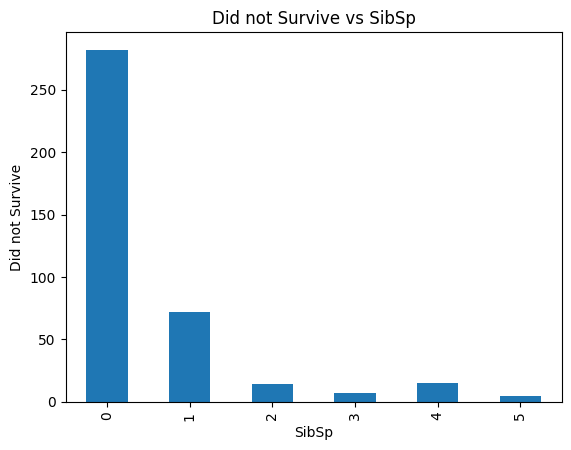

In [92]:
group = df.groupby(['SibSp', 'Survived']).size()
counts = pd.DataFrame({'Did not Survive': group.loc[:, 0].values}, index=['0', '1', '2', '3', '4', '5'])

bar = counts.plot(kind='bar', legend=False)

plt.xlabel('SibSp')
plt.ylabel('Did not Survive')
plt.title('Did not Survive vs SibSp')

plt.show()
#there is barely any data on 2-3-4-5, so we can filter them

In [93]:
df = df[df['SibSp'] <= 1]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,451.172589,0.401015,2.280880,30.200085,0.262267,0.241963,22.568838
std,259.359016,0.490519,0.806093,13.160199,0.440240,0.540557,21.606151
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,448.000000,0.000000,3.000000,29.000000,0.000000,0.000000,13.000000
75%,682.500000,1.000000,3.000000,38.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,65.000000,1.000000,2.000000,93.500000


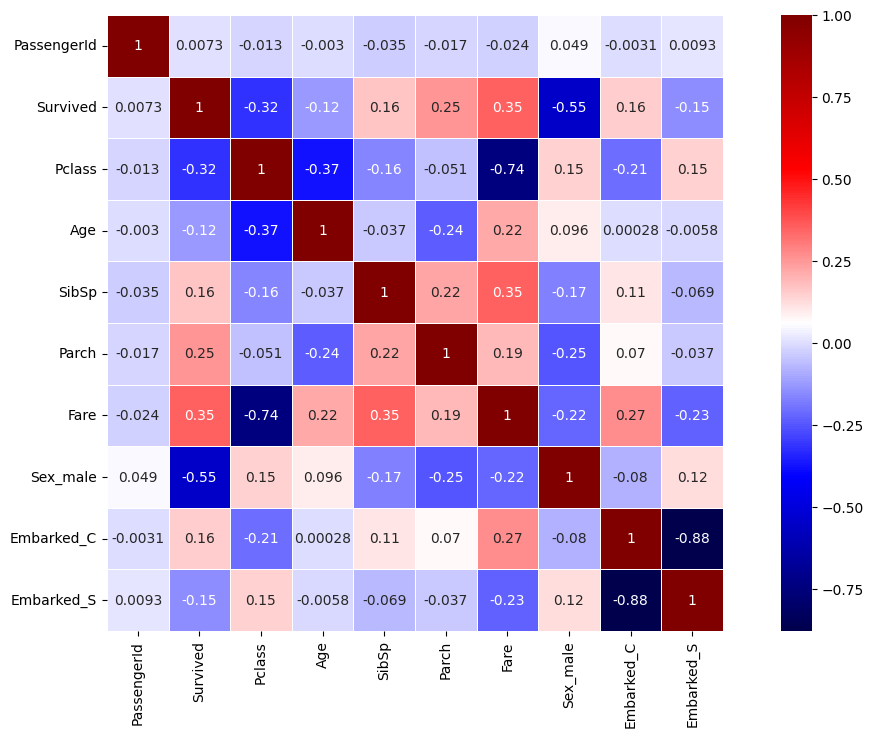

In [94]:
#now we can redo the correlation and check the values

corr_matrix = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic',square=True, linewidths=0.5)

plt.show()


#   -the values have improved well, before the Age, SibSp, and Parch, had little to no effect on the survived, now their
#    effect is noticable 
#   -Also we now see a better correlation between Pclass and Fare after filtering the noisy data
#   -Our model should now be ready for testing

In [95]:
# we also notice that Embarked_C and Embarked_S are very correlated and inversely propartional, 
# hence the absence of one can imply the presence of the other so it's okay to drop one of them
df = df.drop('Embarked_C', axis=1)
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,True
1,2,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,26.0,0,0,7.9250,False,True
3,4,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,35.0,0,0,8.0500,True,True
6,7,0,1,54.0,0,0,51.8625,True,True
8,9,1,3,27.0,0,2,11.1333,False,True
9,10,1,2,14.0,1,0,30.0708,False,False
10,11,1,3,4.0,1,1,16.7000,False,True
11,12,1,1,58.0,0,0,26.5500,False,True


In [96]:
#we want to try and add 2 features together to get a better correlation with survived
#since Sibsp and Parch are both relevant to family members, we can create a new varibale and call it
#family which will define how many family members are present
df['Family'] = df['SibSp'] + df['Parch'] + 1 #accounting for the passenger himself
df = df.drop('SibSp', axis=1)
df = df.drop('Parch', axis=1)

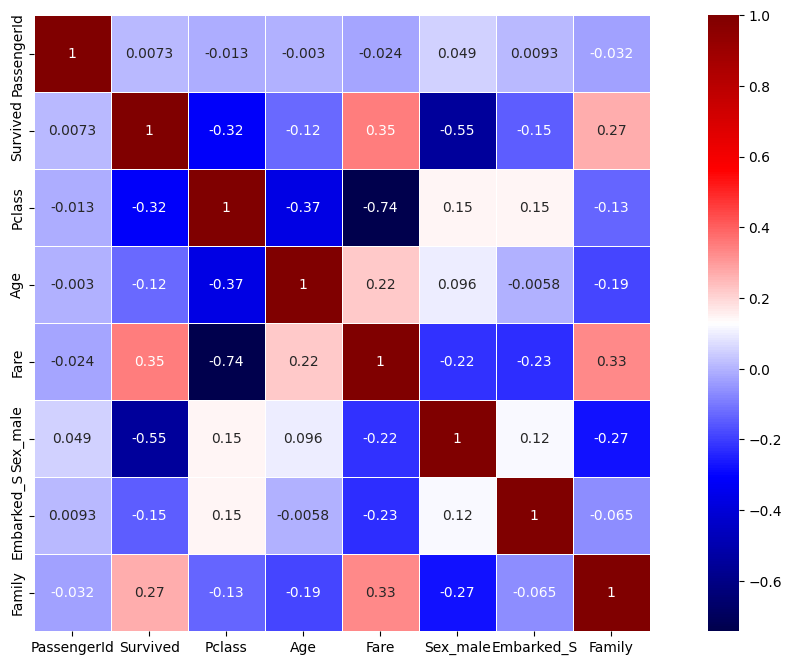

In [97]:
corr_matrix = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic',square=True, linewidths=0.5)

plt.show()
#we notice how before we had 2 correlations of 0.25 and 0.16 for 2 features with the target variable
# now we have 1 feature with a correlation of 0.27 with the target variable which is a good improvement

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [100]:
X = df.drop(['Survived','PassengerId'],axis=1) # survived is our output and passengerid and name can't be used
                                                      # to train the data since passengerid is just to keep track of 
                                                      # how many passengers we have and Name can't be studied since
                                                      # it is a string
y = df['Survived']  #output

In [101]:
X #features

,Pclass,Age,Fare,Sex_male,Embarked_S,Family
0,3,22.0,7.2500,True,True,2
1,1,38.0,71.2833,False,False,2
2,3,26.0,7.9250,False,True,1
3,1,35.0,53.1000,False,True,2
4,3,35.0,8.0500,True,True,1
...,...,...,...,...,...,...
884,3,25.0,7.0500,True,True,1
886,2,27.0,13.0000,True,True,1
887,1,19.0,30.0000,False,True,1
889,1,26.0,30.0000,True,False,1


In [102]:
y #result

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 591, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
#random state is just used to ensure that we can generate the same output everytime we split. If not used
#everytime our train and test split will be different

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#just to check if the size of the matrices are compatible, since incompatible sizes might produce errors

(472, 6)
(119, 6)
(472,)
(119,)


In [105]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = logr.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred))

#we obtained good results, the accuracy of our entire model is 80% which is decent enough

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        67
           1       0.85      0.65      0.74        52

    accuracy                           0.80       119
   macro avg       0.81      0.78      0.79       119
weighted avg       0.81      0.80      0.79       119



In [108]:
#we want to try and hypertune the parameters to minimize the error in the validation set, for this reason we need
# to scale first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [109]:
X_train_std  #scaled data

array([[-0.35132237,  1.1569035 ,  0.18261613, -1.4097311 ,  0.50859283,
         1.95451884],
       [-1.60756598,  1.08041487,  0.25225011, -1.4097311 , -1.96620939,
        -0.65150628],
       [ 0.90492125,  2.68667611, -0.69325322,  0.70935514, -1.96620939,
        -0.65150628],
       ...,
       [-0.35132237,  0.20079562, -0.4446957 , -1.4097311 ,  0.50859283,
        -0.65150628],
       [ 0.90492125,  0.00957404, -0.46955146, -1.4097311 ,  0.50859283,
        -0.65150628],
       [-0.35132237,  1.53934665, -0.4446957 ,  0.70935514,  0.50859283,
        -0.65150628]])

In [110]:
#we want to check both L1 and L2 penalties when hypertuning
# L1 penalty is a penalty added to a regression model (known as lasso regression).
#   it is equal to the sum of absolute values of the model coefficients
# L2 penalty is a penalty added to a regression model (known as ridge regression).
#   it is equal to the sum of squared values of the model coefficients

from sklearn.model_selection import GridSearchCV
lr1 = LogisticRegression(solver='liblinear', penalty='l1')

param_grid1 = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1']}

grid_search1 = GridSearchCV(lr1, param_grid1, cv=5)
grid_search1.fit(X_train_std, y_train) #do grid search on normalized values

cv_results = grid_search1.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params) #used to print the validation accuracy over different hyperparameter values

print("Best hyperparameters: {}".format(grid_search1.best_params_))

# Evaluate the model with the best hyperparameters on the test set
best_model_l1 = grid_search1.best_estimator_
y_pred_l1 = best_model_l1.predict(X_test_std)
print(classification_report(y_test, y_pred_l1))

0.7413213885778275 {'C': 0.01, 'penalty': 'l1'}
0.7838745800671892 {'C': 0.1, 'penalty': 'l1'}
0.7986562150055991 {'C': 1, 'penalty': 'l1'}
0.8029115341545353 {'C': 10, 'penalty': 'l1'}
0.8029115341545353 {'C': 100, 'penalty': 'l1'}
Best hyperparameters: {'C': 10, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        67
           1       0.85      0.63      0.73        52

    accuracy                           0.79       119
   macro avg       0.80      0.77      0.78       119
weighted avg       0.80      0.79      0.78       119



In [111]:
#we do the same but for the L2 penalty

lr2 = LogisticRegression(solver='lbfgs', penalty='l2')

param_grid2 = {'C': [0.01, 0.1, 1, 10, 100],
               'penalty': [ 'l2']}

grid_search2 = GridSearchCV(lr2,param_grid2,cv=5)
grid_search2.fit(X_train_std, y_train)

cv_results2 = grid_search2.cv_results_
for mean_score, params in zip(cv_results2["mean_test_score"], cv_results2["params"]):
    print(mean_score, params)

print("Best hyperparameters: {}".format(grid_search2.best_params_))

best_model_l2 = grid_search2.best_estimator_
y_pred_l2 = best_model_l2.predict(X_test_std)
print(classification_report(y_test, y_pred_l2))

0.7817021276595745 {'C': 0.01, 'penalty': 'l2'}
0.7901903695408735 {'C': 0.1, 'penalty': 'l2'}
0.7986562150055991 {'C': 1, 'penalty': 'l2'}
0.8029115341545353 {'C': 10, 'penalty': 'l2'}
0.8029115341545353 {'C': 100, 'penalty': 'l2'}
Best hyperparameters: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        67
           1       0.85      0.63      0.73        52

    accuracy                           0.79       119
   macro avg       0.80      0.77      0.78       119
weighted avg       0.80      0.79      0.78       119



In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        67
           1       0.85      0.65      0.74        52

    accuracy                           0.80       119
   macro avg       0.81      0.78      0.79       119
weighted avg       0.81      0.80      0.79       119



In [113]:
#if we compare the new results we got to the previous results we had, we can realize that accuracy decreased
# along with other metrics. Choosing better validation accuracy led to less test accuracy. This can happen
# sometimes, and this doesn't mean that it is a bad thing. Hypertuning paramters is done to generalize the model
# to be able to get higher test accuracies for other untested data. In a way we reduced overfitting for this specific
# dataset which is why our test accuracy decreased. However, if we go and test our model on new data not from this
# dataset, we should get better results than if we used to nontuned model.

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
# train a decision tree classifier that will be used as reference
clf = DecisionTreeClassifier(random_state=72)

# fit the training data 
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print(classification_report(y_test, y_pred_tree))

#here in the decision tree model, we got a lower accuracy than in the logistic regression model
# we also got lower precision, recall, and f1-score. This means that for this data, it is better
# to use a logitics regression model than a decision tree model

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        67
           1       0.75      0.58      0.65        52

    accuracy                           0.73       119
   macro avg       0.74      0.71      0.72       119
weighted avg       0.73      0.73      0.72       119



In [116]:
#now we try to test our model but for the adaboost classifier
boost = AdaBoostClassifier(n_estimators=6, random_state=72)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print(classification_report(y_test, y_pred_boost))

#we kind of got similar results to the logistic regression model, however the logistic regression model
# still yielded better scores

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        67
           1       0.83      0.65      0.73        52

    accuracy                           0.79       119
   macro avg       0.80      0.77      0.78       119
weighted avg       0.80      0.79      0.79       119

